## building Simple FFNN

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [6]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [7]:
data_path = '/media/mahfuz/Media/datasets/MNIST_dataset/mnist_train.csv'

In [9]:
df = pd.read_csv(data_path)
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y = df['label']
X = df.drop('label', axis=1)

In [12]:
X.sample(10).iloc[:, 200:]

,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
16192,0,0,0,0,0,0,68,244,253,253,...,0,0,0,0,0,0,0,0,0,0
546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53239,0,0,0,0,0,59,253,253,253,253,...,0,0,0,0,0,0,0,0,0,0
12246,0,0,0,0,0,0,0,29,32,32,...,0,0,0,0,0,0,0,0,0,0
12633,0,0,0,0,0,138,252,252,252,252,...,0,0,0,0,0,0,0,0,0,0
23032,0,0,0,0,0,41,243,253,252,253,...,0,0,0,0,0,0,0,0,0,0
12750,0,0,0,0,81,102,0,0,0,50,...,0,0,0,0,0,0,0,0,0,0
59957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40578,202,253,253,242,237,241,235,235,235,235,...,0,0,0,0,0,0,0,0,0,0


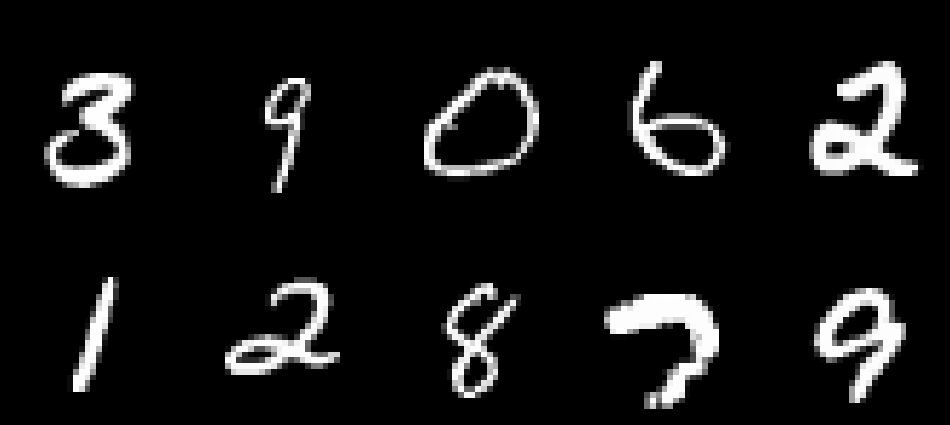

In [16]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,6000, size=10)
for i in range(10):
    axes[i].imshow(X.iloc[idx[i],:].values.reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the exes ticks 
    axes[i].set_title(str(int(y[idx[i]])), color='black', fontsize=25)
plt.show()

In [17]:
# trian and text val dataset splitting 
x_t, x_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_t, y_t, test_size=0.2, random_state=42)

In [18]:
# Normalizeing the dataset

normalizer = Normalizer()
x_train = normalizer.fit_transform(x_train)
x_val = normalizer.transform(x_val)
x_test = normalizer.transform(x_test)

In [19]:
lst = list(range(1,11))

In [20]:
lst[0]

1

## Dataset & DataLoader
1. Basic idea behind the ```Dataset``` and ```DataLoader``` class is to be decoupled from our model training code for beter readability and modularity. 
2. PyTorch provides two data primitive: ```torch.utils.data.DataLoader``` and ```torch.utils.data.Datasets``` that allow you to use pre-loader datasets as well as your own data. 
3. ```Dataset``` class stores the samples and their corresponding labels, and ```DataLoader``` class wraps an iterable around the Dataset to enable easy access to the samples.

## Data Class
A custom Dataset class must implement thre functions: ```__init__```, ```__len__``` and ```__getitem__```.
1. The ```__init__``` function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both tranforms 
2. The ```__len__`` funcition returns the number of samples in our dataset.
3. The ```__getitem__``` function loads and returns sample from the dataset at the given index idx. Based on the index, it identifies the sample and label and return it as a tuple.

In [21]:
# Example code to understand dataset and DataLoader
import torch
from torch.utils.data import Dataset, DataLoader

# Step 1: Define the custom Dataset
class SquareDataset(Dataset):
    def __init__(self, n):
        self.n = n

    def __len__(self):
        return self.n

    def __getitem__(self, idx):
        sample = {'number': idx, 'square': idx ** 2}
        return sample

# Step 2: Create an instance of the dataset
dataset = SquareDataset(n=10)

# Step 3: Create a DataLoader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Step 4: Iterate through the DataLoader
for batch in dataloader:
    print(batch)


{'number': tensor([3, 8]), 'square': tensor([ 9, 64])}
{'number': tensor([1, 7]), 'square': tensor([ 1, 49])}
{'number': tensor([5, 6]), 'square': tensor([25, 36])}
{'number': tensor([4, 9]), 'square': tensor([16, 81])}
{'number': tensor([2, 0]), 'square': tensor([4, 0])}


In [23]:
# Make a custom dataset. 
class customer_dataset(Dataset):
    def __init__(self, features, label):
        self.features = features
        self.label = label

    def __len__(self):
        return self.features.shape[0]
    
    def __getitem__(self, idx):
        sample = self.features[idx]
        label = self.label.values[idx]
        sample_tensor = torch.tensor(sample, dtype=torch.float32)
        label_tensor = torch.tensor(label, dtype=torch.long)
        return sample_tensor, label_tensor
            

In [24]:
train_dataset = customer_dataset(x_train, y_train)
val_dataset = customer_dataset(x_val, y_val)
test_dataset = customer_dataset(x_test, y_test)

## DataLoader class
The Dataset retrives our dataset's features and label one sample at a time. While training a model, we typically want to pass smaple in 'minibatches', reshuffle the data at every epoch to reduce model overfitting and use python's multiprocessing to speed up data retrival.

```DataLoader is an iterable that abstracts this compliexity for  us in an easy API```

When we load the dataset into DataLoader and we can iterate through the dataset as needed.

In [25]:
batch_size = 64 

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [26]:
train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=True
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=True
)

In [27]:
data, label = next(iter(train_dataloader))
print(data[:, 278:300])
print(label)

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0476, 0.0710, 0.0948],
        [0.0000, 0.0000, 0.0000,  ..., 0.0086, 0.0086, 0.0602],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0362, 0.0892],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0261],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])
tensor([7, 0, 2, 7, 2, 9, 7, 5, 8, 0, 4, 5, 5, 7, 2, 6, 4, 1, 2, 8, 0, 3, 9, 5,
        3, 2, 5, 3, 8, 7, 5, 3, 1, 3, 4, 8, 7, 9, 9, 5, 4, 6, 5, 2, 6, 3, 9, 7,
        1, 5, 1, 6, 3, 2, 0, 2, 7, 6, 9, 1, 3, 4, 1, 8])


In [29]:
data.size()

torch.Size([64, 784])